In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pandas.core.frame import DataFrame

filename = 'healthcare-dataset-stroke-data.csv'
cols = ['gender','age','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type','avg_glucose_level','bmi', 'smoking_status','stroke']

df = pd.read_csv(filename, usecols=cols)

In [3]:
# Check datatype each column of dataframe
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df: DataFrame, numeric_df: DataFrame):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")

printColumnTypes(cat_df, num_df)

Non-Numeric columns:
gender
ever_married
work_type
Residence_type
smoking_status

Numeric columns:
age
hypertension
heart_disease
avg_glucose_level
bmi
stroke


In [4]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Terdapat Missing Value pada Attribute BMI
Hal ini ditandakan pada kolom bmi terdapat 201 missing value

In [7]:
def print_unique_value(cols: list):
    for col in cols:
        print(f"{col}: {df[col].unique()}")
        
non_numeric_col = ['gender','ever_married','work_type','Residence_type', 'smoking_status']

print_unique_value(non_numeric_col)

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [8]:
def print_percentage_data(dataframe, cols: list[str] | str):
    if type(cols) == str:
        print(dataframe[cols].value_counts() / len(dataframe))
        return

    for col in cols:
        print(dataframe[col].value_counts() / len(dataframe))
        print()

print_percentage_data(df, non_numeric_col)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64



### Pra-process
- Data Cleansing
- Remove Outlier
- Label Encoding

In [9]:
mean_bmi_replacement_value = df.loc[:,'bmi'].dropna().mean()
df['bmi'] = df.loc[:, 'bmi'].fillna(mean_bmi_replacement_value)

df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
modus_smoking_status = df['smoking_status'].max()
df['smoking_status'] = df['smoking_status'].apply(lambda x: modus_smoking_status if x == 'Unknown' else x)

df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [11]:
print_percentage_data(df, 'smoking_status')

smokes             0.456556
never smoked       0.370254
formerly smoked    0.173190
Name: smoking_status, dtype: float64


In [12]:
df = df[df['gender'] != 'Other']

print_percentage_data(df, 'gender')

Female    0.586025
Male      0.413975
Name: gender, dtype: float64


In [13]:
num_gender = { 'Female': 0, 'Male': 1 }
num_ever_married = { 'No': 0, 'Yes': 1 }
num_smoking_status = {
    'formerly smoked': 0,
    'never smoked': 1,
    'smokes': 2,
}

num_work_type = {
    'children': 0,
    'Govt_job': 1,
    'Never_worked': 2,
    'Private': 3,
    'Self-employed': 4,
}
num_residence_type = {
    'Urban': 0,
    'Rural': 1
}

# Label Encoding
df['gender'] = df['gender'].replace(num_gender)
df['ever_married'] = df['ever_married'].replace(num_ever_married)
df['Residence_type'] = df['Residence_type'].replace(num_residence_type)
df['smoking_status'] = df['smoking_status'].replace(num_smoking_status)
df['work_type'] = df['work_type'].replace(num_work_type)

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,0,228.69,36.600000,0,1
1,0,61.0,0,0,1,4,1,202.21,28.893237,1,1
2,1,80.0,0,1,1,3,1,105.92,32.500000,1,1
3,0,49.0,0,0,1,3,0,171.23,34.400000,2,1
4,0,79.0,1,0,1,4,1,174.12,24.000000,1,1


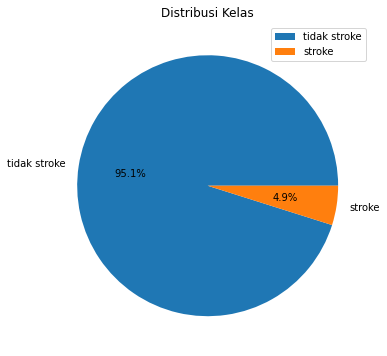

In [15]:
stroke_value_count = df['stroke'].value_counts()
replace_index = ["tidak stroke" if i == 0 else "stroke" for i in stroke_value_count.index]

plt.figure(figsize=(6, 6))
plt.pie(stroke_value_count.values,labels=replace_index, autopct='%1.1f%%')
plt.title('Distribusi Kelas')
plt.legend()
plt.show()

In [16]:
X = df.iloc[:, df.columns != 'stroke']
y = df.stroke

X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,3,0,228.69,36.600000,0
1,0,61.0,0,0,1,4,1,202.21,28.893237,1
2,1,80.0,0,1,1,3,1,105.92,32.500000,1
3,0,49.0,0,0,1,3,0,171.23,34.400000,2
4,0,79.0,1,0,1,4,1,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,3,0,83.75,28.893237,1
5106,0,81.0,0,0,1,4,0,125.20,40.000000,1
5107,0,35.0,0,0,1,4,1,82.99,30.600000,1
5108,1,51.0,0,0,1,3,1,166.29,25.600000,0


### **Membuat function melakukan visualisasi distribusi kelas**

Visualisasi dilakukan menggunakan library  `Matplotlib`
Untuk mempermudah akan dibentuk dalam 1 function 
```python 
def viz_distribution_of_class(X,y, col_idx, title) 
```

| Parameter | Deskripsi | Data Type |
| --------- | --------- | --------- |
| X | Fitur pada dataset | Numpy Array | 
| y | Kelas pada dataset | Numpy Array |
| col_idx | index column yang merepresentasikan dataset | Tupple [0, 1] |
| title | Title Visualisasi (default "") | String / None |


In [17]:
from collections import Counter
from matplotlib import pyplot
from numpy import where


def viz_distribution_of_class(X, y, col_idx, title="") -> None:
    plt = pyplot
    counter = Counter(y)
    print(counter)
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y != label)[0]
        plt.title(title)
        plt.scatter(X[row_ix, col_idx[0]], X[row_ix, col_idx[1]], label=str(label))
        plt.legend()
    plt.show()

### Visualisasi Distribusi kelas sebelum dilakukan resampling

Counter({0: 4860, 1: 249})


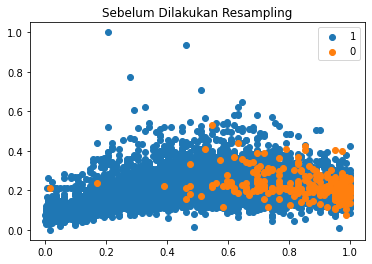

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

viz_distribution_of_class(X_scaled, y, [1,8], title="Sebelum Dilakukan Resampling")

Counter({0: 249, 1: 249})


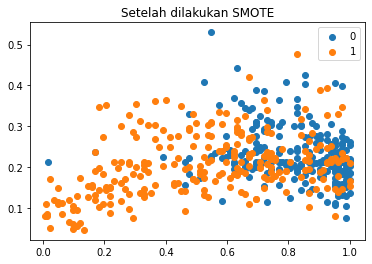

In [19]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler()
X_undersampler, y_undersampler = undersampler.fit_resample(X_scaled, y)

viz_distribution_of_class(X_undersampler, y_undersampler, [1,8], title="Setelah dilakukan SMOTE")

### Visualisasi Distribusi Kelas Setelah dilakukan SMOTE

Counter({1: 4860, 0: 4860})


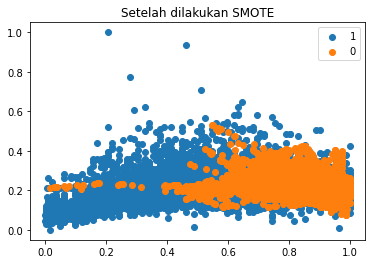

In [20]:
from imblearn.over_sampling import SMOTE

sm_oversampl = SMOTE()
X_oversampling, y_oversampling = sm_oversampl.fit_resample(X_scaled, y)

viz_distribution_of_class(X_oversampling, y_oversampling, [1,8], title="Setelah dilakukan SMOTE")

### Visualisasi Distribusi Kelas Setelah dilakukan SMOTE + TomekLink

Counter({0: 4860, 1: 4797})


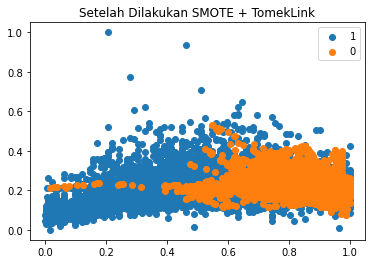

In [21]:
from imblearn.under_sampling import TomekLinks


tomekLink = TomekLinks()
X_tomekLink, y_tomekLink = tomekLink.fit_resample(X_oversampling, y_oversampling)

viz_distribution_of_class(X_tomekLink, y_tomekLink, [1,8], title="Setelah Dilakukan SMOTE + TomekLink")

### Visualisasi Distribusi Kelas Setelah dilakukan SMOTE + ENN

Counter({0: 4860, 1: 4401})


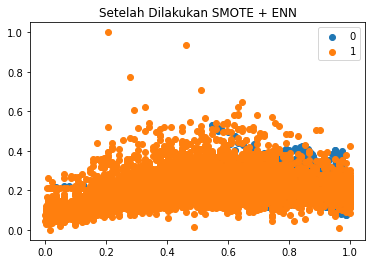

In [22]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X_oversampling, y_oversampling)

viz_distribution_of_class(X_enn, y_enn, [1,8], title="Setelah Dilakukan SMOTE + ENN")

### **Process Evaluasi Model Menggunakan 10-cross-validation**

1. Tanpa Seleksi Fitur Information Gain :
    - SMOTE
    - SMOTE + TomekLink
    - SMOTE + ENN

2. Menggunakan Seleksi Fitur Information Gain :
    - SMOTE
    - SMOTE + TomekLink
    - SMOTE + ENN

Evaluasi Model berupa :
- F-measure
- ROC / AUC

Source Belajar : 
1. [SMOTE for imbalanced dataset](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# Resampling 

class Evaluate():
    def __init__(self, _X, _y):
        self._x = _X
        self._y = _y
        self.result = []

    def print_result(self):
        result_df = pd.DataFrame.from_records(self.result)
        print(result_df)

    def _mutation_dataframe_cv(self, action, pipeline, cv):
        scores = cross_validate(pipeline, self._x, self._y, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=cv, n_jobs=-1)
        _result = {
            'action': action,
            'attribute': self._x.shape[1],
            'label': f"{action}_{self._x.shape[1]}"
        }
        for key in scores:
            _result[key] = np.mean(scores[key])
        self.result.append(_result)

    def cross_validate(self):
        oversampling = SMOTE(random_state=42)
        undersampling = RandomUnderSampler(random_state=1)
        tl = TomekLinks()
        enn = EditedNearestNeighbours(sampling_strategy="all")
        model = KNeighborsClassifier(n_neighbors=3 ,weights='distance', metric='euclidean')

        # pipeline_knn = Pipeline(steps = [
        #     ['classifier', model]
        # ])

        # pipeline_undersampling = Pipeline(steps = [
        #     ['rundersampling', undersampling],
        #     ['classifier', model]
        # ])

        # pipeline_smote = Pipeline(steps = [
        #     ['over', oversampling],
        #     ['classifier', model]
        # ])

        # pipeline_smote_tomek = Pipeline(steps = [
        #     ['over', oversampling],
        #     ['tomek', tl],
        #     ['classifier', model],
        # ])

        # pipeline_smote_enn = Pipeline(steps = [
        #     ['over', oversampling],
        #     ['enn', enn],
        #     ['classifier', model],
        # ])

        cv = KFold(n_splits=10,random_state=1, shuffle=True)

        self._mutation_dataframe_cv(action="KNN",pipeline=pipeline_knn, cv=cv )
        self._mutation_dataframe_cv(action="Random_under",pipeline=pipeline_undersampling, cv=cv )
        self._mutation_dataframe_cv(action="SMOTE",pipeline=pipeline_smote, cv=cv )
        self._mutation_dataframe_cv(action="SMOTE-Tomek", pipeline=pipeline_smote_tomek,cv=cv)
        self._mutation_dataframe_cv(action="SMOTE-ENN", pipeline=pipeline_smote_enn,cv=cv)

        return self
        # def print_scores(scores, title: str=''):
        #     print(title)
        #     for key in scores:
        #         print(f"{key}: {np.mean(scores[key])}")
        #     print("\n")

        # print_scores(scores_smote, 'evaluasi 10 cross validation SMOTE')
        # print_scores(scores_smote_tomek, 'evaluasi 10 cross validation SMOTE-TomekLinks')
        # print_scores(scores_smote_enn, 'evaluasi 10 cross validation SMOTE-ENN')


In [26]:
standart_evaluate = Evaluate(X_scaled, y)
standart_evaluate.cross_validate().print_result()

         action  attribute            label  fit_time  score_time  \
0           KNN         10           KNN_10  0.023167    0.122208   
1  Random_under         10  Random_under_10  0.009159    0.037342   
2         SMOTE         10         SMOTE_10  0.063347    0.212777   
3   SMOTE-Tomek         10   SMOTE-Tomek_10  1.173184    0.139626   
4     SMOTE-ENN         10     SMOTE-ENN_10  1.186709    0.118815   

   test_accuracy  test_precision  test_recall   test_f1  test_roc_auc  
0       0.933648        0.089947     0.041338  0.054484      0.585407  
1       0.668040        0.095819     0.698925  0.167636      0.737056  
2       0.840483        0.093190     0.261687  0.135053      0.621732  
3       0.843223        0.094784     0.261687  0.136653      0.617398  
4       0.790183        0.109644     0.467787  0.175426      0.666827  


## Percobaan Evaluasi model dengan tambahan Seleksi Fitur

Seleksi Fitur : **Information Gain**

Source Belajar :
1. [How to implement Information Gain using python](https://www.youtube.com/watch?v=81JSbXZ26Ls&ab_channel=KrishNaik)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_scaled, y, random_state=1)
mutual_info = pd.Series(mutual_info)
mutual_info.index = df.iloc[:, df.columns != 'stroke'].columns
mutual_info.sort_values(ascending=False)

# ig_zipped = zip(df.iloc[:, df.columns != 'stroke'].columns, mutual_info_classif(X_scaled,y, random_state=1))
# ig_df = pd.DataFrame(sorted(ig_zipped, key=lambda x: x[1], reverse=True), columns=['Features', 'entrophy'])
# ig_df


age                  0.037602
bmi                  0.004955
avg_glucose_level    0.004524
hypertension         0.003376
heart_disease        0.002876
smoking_status       0.001675
ever_married         0.000309
gender               0.000000
work_type            0.000000
Residence_type       0.000000
dtype: float64

<Axes: >

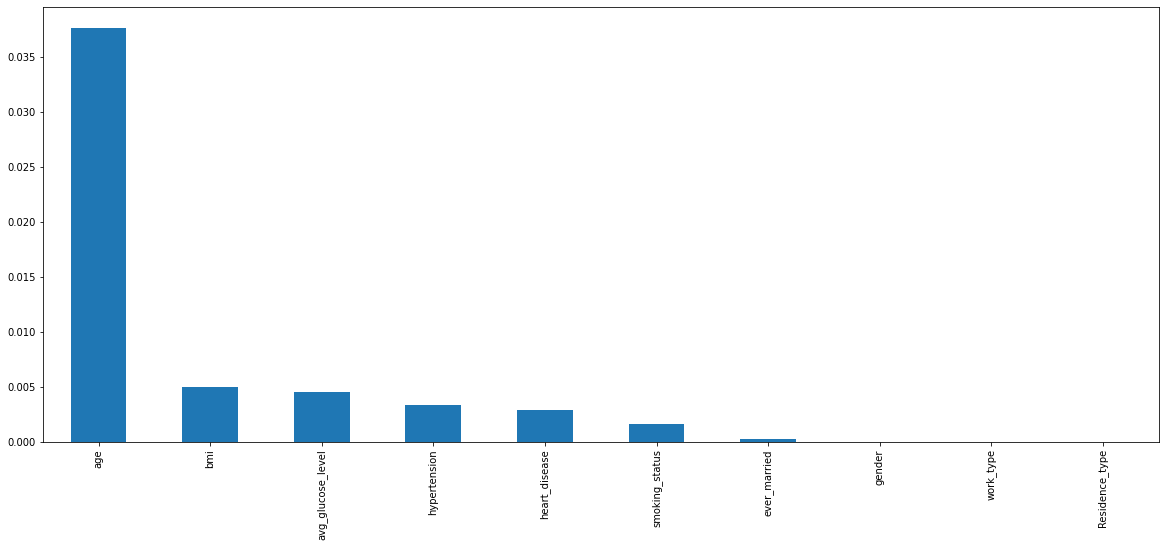

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
def mic_static_random(X,y):
    return mutual_info_classif(X,y, random_state=1)

sel_five_cols = SelectKBest(mic_static_random, k=5)
sel_five_cols.fit(X_scaled, y)

X_ig = pd.DataFrame(X_scaled, columns=X.columns).iloc[:, sel_five_cols.get_support()]

In [ ]:
selection_features_evaluate = Evaluate(X_ig, y)
selection_features_evaluate.cross_validate().print_result()

        action  attribute          label  fit_time  score_time  test_accuracy  \
0        SMOTE          5        SMOTE_5  0.049817    0.087799       0.788693   
1  SMOTE-Tomek          5  SMOTE-Tomek_5  0.481696    0.076608       0.792984   
2    SMOTE-ENN          5    SMOTE-ENN_5  0.469162    0.064795       0.738610   

   test_precision  test_recall   test_f1  test_roc_auc  
0        0.108314     0.359917  0.165909      0.654573  
1        0.106733     0.342474  0.162120      0.646648  
2        0.126086     0.574282  0.205842      0.683572  


## Percobaan evaluasi model menggunakan Seleksi Fitur dengan banyak fitur 5-10

In [ ]:
test_k_best = [5,6,7,8,9,10]

temp_result_val = []
for i in test_k_best:
    sel_five_cols = SelectKBest(mic_static_random, k=i)
    sel_five_cols.fit(X_scaled, y)

    test_X_ig = pd.DataFrame(X_scaled, columns=X.columns).iloc[:, sel_five_cols.get_support()]
    selection_features_evaluate = Evaluate(test_X_ig, y)
    selection_features_evaluate.cross_validate()
    temp_result_val.append(selection_features_evaluate.result)

temp_result_val = np.array(temp_result_val).flatten()

In [ ]:
result_evaluate = pd.DataFrame.from_records(temp_result_val)
result_evaluate.sort_values(['action','attribute'])

,action,attribute,label,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,SMOTE,5,SMOTE_5,0.038302,0.086884,0.788693,0.108314,0.359917,0.165909,0.654573
3,SMOTE,6,SMOTE_6,0.041696,0.088548,0.795362,0.124763,0.415677,0.190644,0.651102
6,SMOTE,7,SMOTE_7,0.054372,0.135278,0.798469,0.131193,0.439725,0.201195,0.666204
9,SMOTE,8,SMOTE_8,0.151512,0.499884,0.792495,0.117977,0.393523,0.180502,0.647404
12,SMOTE,9,SMOTE_9,0.116259,0.303284,0.810633,0.108659,0.309967,0.159681,0.611537
15,SMOTE,10,SMOTE_10,0.116327,0.300578,0.821125,0.100701,0.260161,0.144441,0.593314
2,SMOTE-ENN,5,SMOTE-ENN_5,0.502982,0.080433,0.738610,0.126086,0.574282,0.205842,0.683572
5,SMOTE-ENN,6,SMOTE-ENN_6,0.691525,0.090179,0.736221,0.126559,0.592717,0.207766,0.694333
8,SMOTE-ENN,7,SMOTE-ENN_7,0.804820,0.083421,0.741952,0.132997,0.615613,0.217829,0.703831
11,SMOTE-ENN,8,SMOTE-ENN_8,0.949143,0.101762,0.740035,0.122293,0.556518,0.199324,0.676181


In [ ]:
def viz_evaluate(x, y, title=''):
    plt.figure(figsize=(24,6))
    plt.bar(x, y)

    plt.xticks([0], fontsize=8)

    plt.xlabel('Method')
    plt.ylabel('Values')

    plt.title(title)
    plt.show()

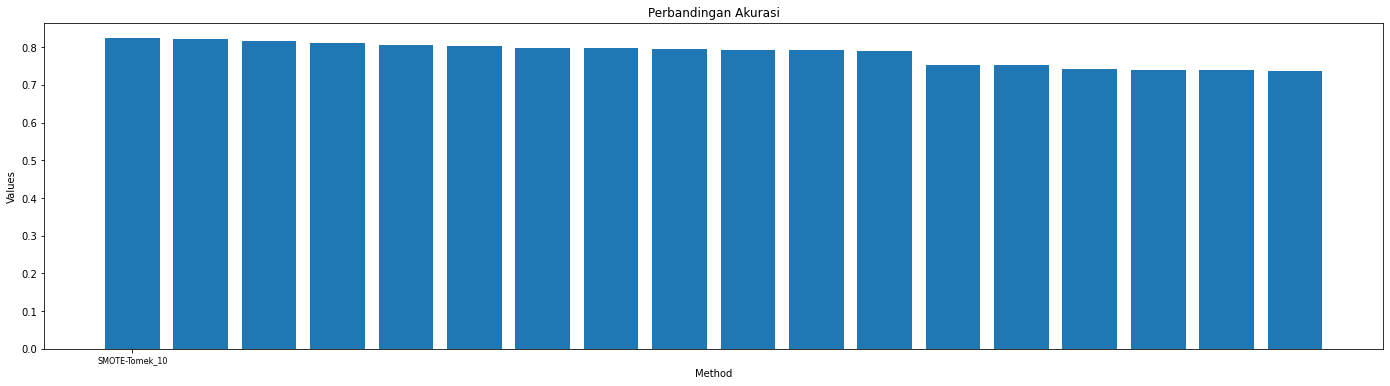

In [ ]:
by_accuracy = result_evaluate.sort_values('test_accuracy', ascending=False)

viz_evaluate(by_accuracy['label'], by_accuracy['test_accuracy'], "Perbandingan Akurasi")

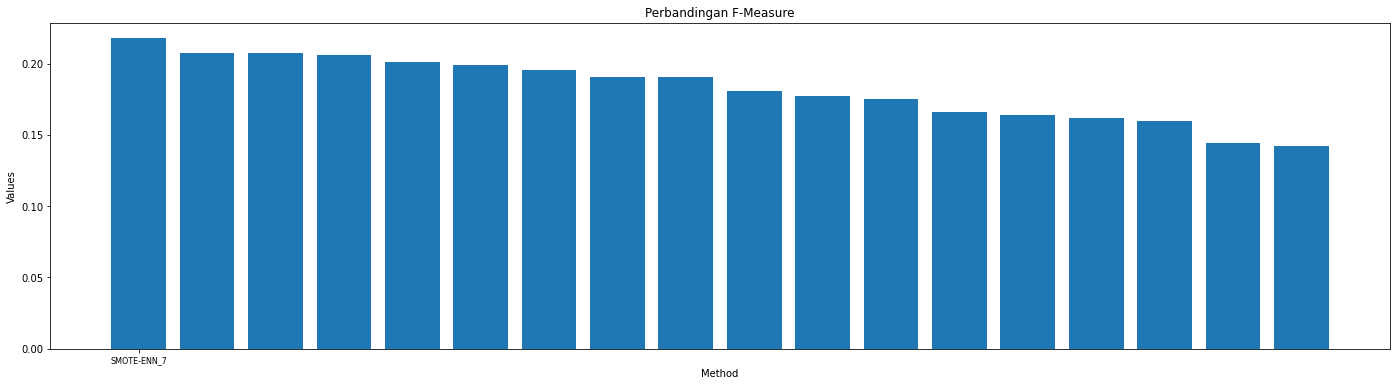

In [ ]:
by_f1 = result_evaluate.sort_values('test_f1', ascending=False)

viz_evaluate(by_f1['label'], by_f1['test_f1'], "Perbandingan F-Measure")

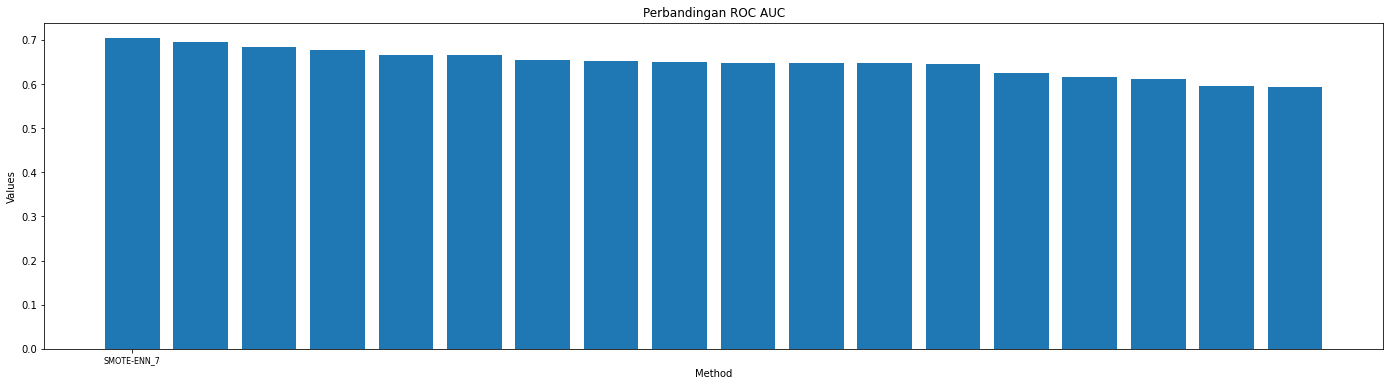

In [ ]:
by_roc_auc = result_evaluate.sort_values('test_roc_auc', ascending=False)

viz_evaluate(by_roc_auc['label'], by_roc_auc['test_roc_auc'], "Perbandingan ROC AUC")


### Hasil Evaluasi

Top Rank tiap nilai evaluasi:
- Akurasi : SMOTE-Tomek (attribute 9)
- F-Measure : SMOTE-ENN (attribute 7)
- ROC-AUC : SMOTE-ENN (attribute 5)